## Hubble data with `optim`

In [1]:
library(repr)
data <- read.table("hubble_data.txt", header=T)
x <- data[, 1] # Print all column 1
y <- data[, 2]

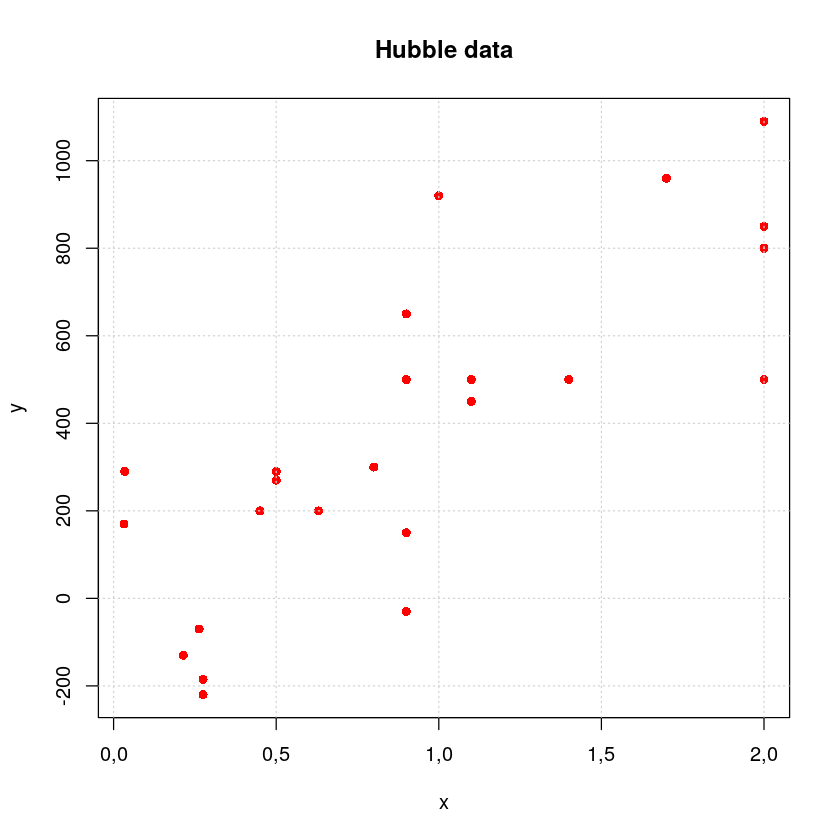

In [2]:
plot(x, y, col="red", pch=16, main="Hubble data", xlab="x", ylab="y" )
grid()

In [3]:
# Initial function
Hfit <- function(x, a){
    fit <- x * a
    return(fit)
}

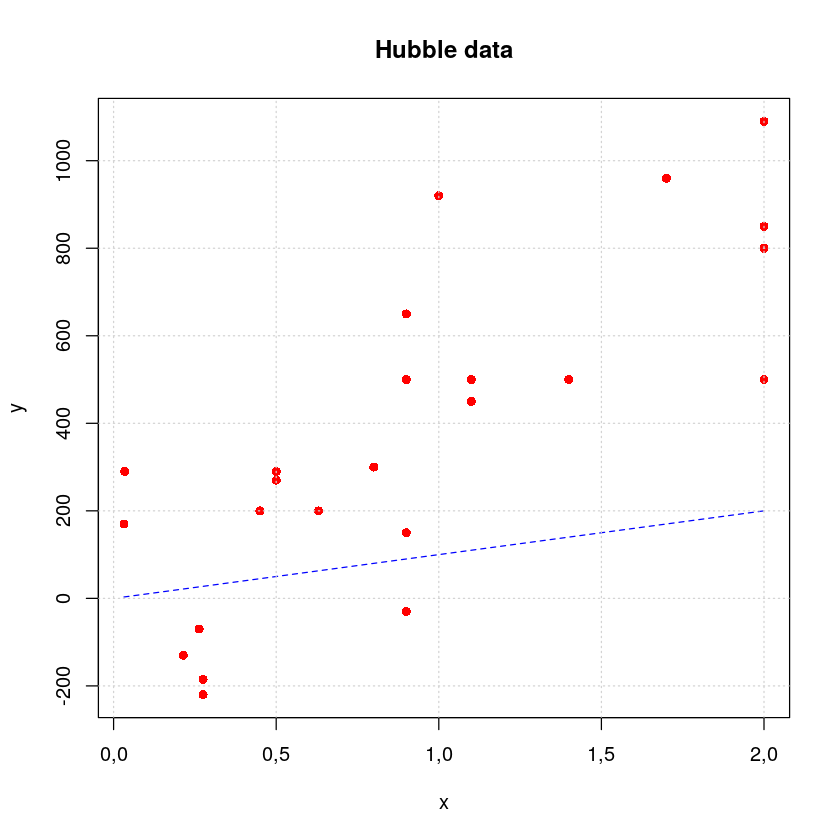

In [4]:
plot(x, y, col="red", pch=16, main="Hubble data", xlab="x", ylab="y" )
curve(Hfit(x=x, a=100), col="blue", add=T , lty=2)
grid()

In [5]:
# Function to minimize squared distances
Hmin <- function(a, x, y) {
    #p are the parameters of the function. In this case only 1
    # p is assumed to be a vector, therefore p[1] would be the first value 
    a1 <- a[1]
    output <- sum((y - x * a1) ^ 2) # sum dist squared
    return(output)
}

a = 100
#Fitting 
solution <- optim(c(a),  Hmin, x=x, y=y)
Fit.a <- solution$par
print(Fit.a)

Warning message in optim(c(a), Hmin, x = x, y = y):
“one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly”

[1] 423,9062


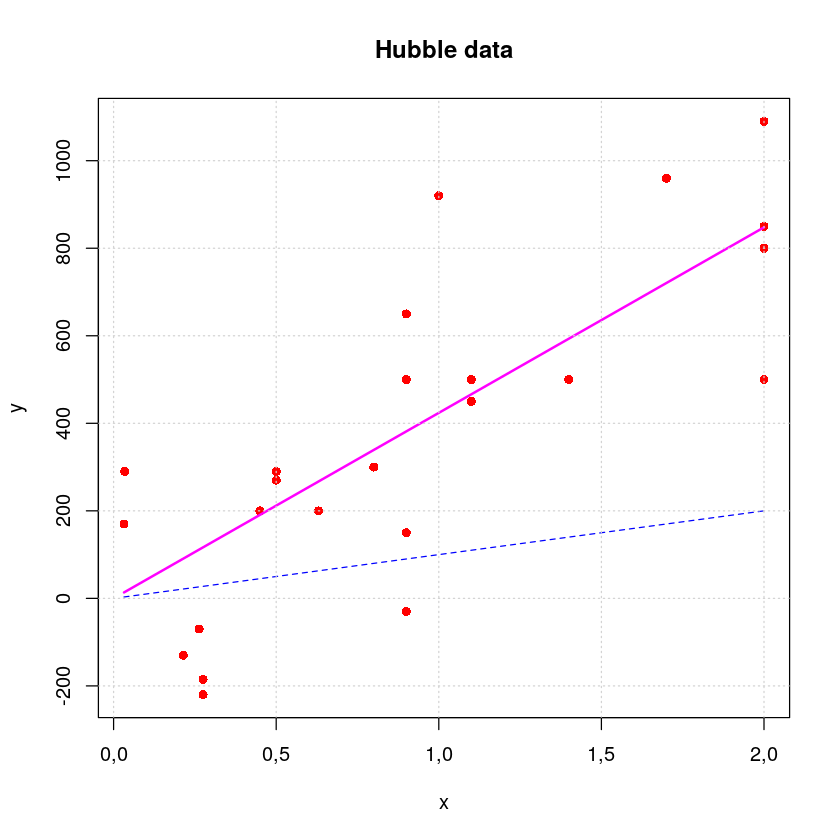

In [6]:
plot(x, y, col="red", pch=16, main="Hubble data", xlab="x", ylab="y" )
curve(Hfit(x=x, a=100), col="blue", add=T , lty=2)
curve(Hfit(x=x, a=Fit.a), col="magenta", add=T, lw=2)
grid()

## Class exercise

In [6]:
# First part
x <- seq(3.4, 5.2, length.out=40)
y <- dnorm(x, mean=4.27, sd=0.34)


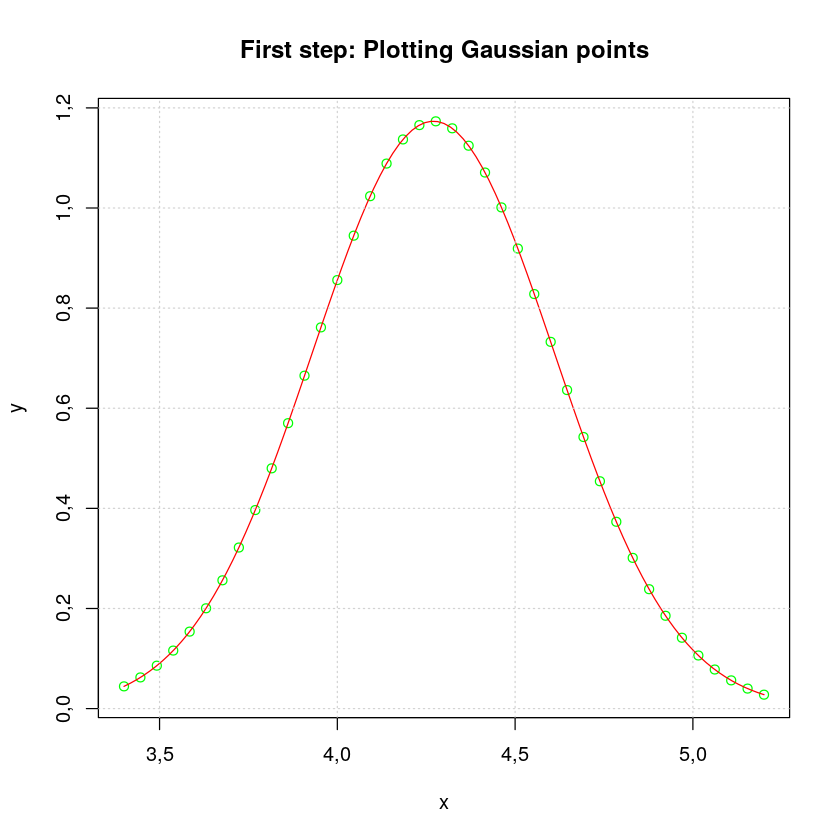

In [7]:
plot(x, y, col="green", main="First step: Plotting Gaussian points")
curve(dnorm(x, mean=4.27, sd=0.34), add=T, col="red")
grid()

In [8]:
library(Hmisc)

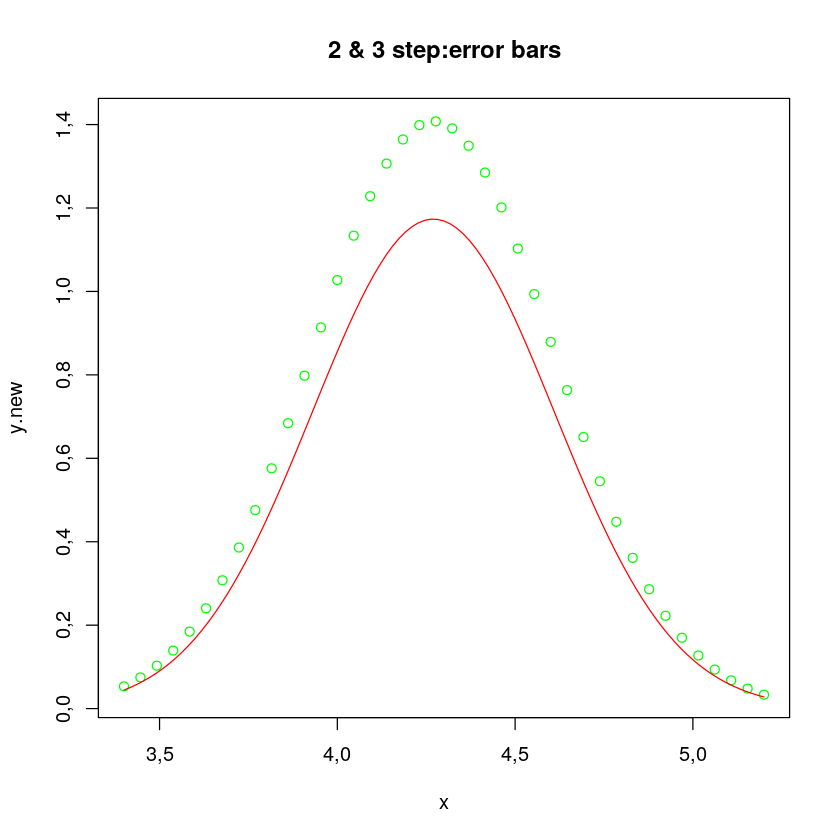

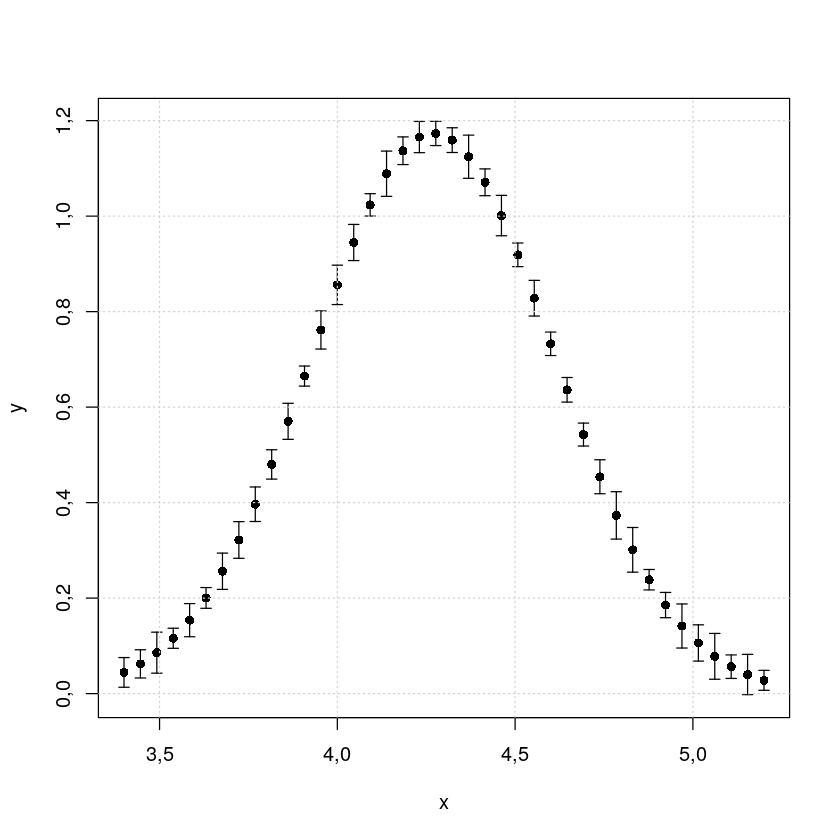

In [9]:
#Move points "y" value a random quantity between -20% and 20% (uniform)
unif <- runif(length(x), min=0.20, max=0.20)
y.new <- (1 + unif) * y

#Give them a uniform error in [0.02, 0.05]
y.error <- runif(length(x), min=0.02, max=0.05)

plot(x, y.new, col="green", main="2 & 3 step:error bars")
curve(dnorm(x, mean=4.27, sd=0.34), add=T, col="red")
errbar(x, y, yplus=y+y.error, yminus=y-y.error)
grid()